Importações de Bibliotecas nescessárias

Panda uma biblioteca poderosa para manipulação e análise de dados. Ela oferece estruturas de dados rápidas, flexíveis e expressivas, como DataFrame e Series, que facilitam a leitura, manipulação e análise de dados tabulares. NumPy é uma biblioteca para computação científica em Python. Ela fornece suporte para arrays e matrizes grandes, juntamente com uma coleção de funções matemáticas para operar sobre esses arrays. Matplotlib é uma biblioteca de plotagem 2D para Python que produz figuras de alta qualidade em uma variedade de formatos de saída e ambientes interativos. TensorFlow é uma biblioteca de código aberto para aprendizado de máquina e Keras é uma API de para construir e treinar modelos de aprendizado profundo, que pode ser usada com TensorFlow.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
#from sklearn.model_selection import ParameterGrid
#from sklearn.model_selection import KFold

Quando você executa esta linha de código, o Pandas abre o arquivo Excel especificado no caminho fornecido. Este arquivo deve estar no formato Excel (.xlsx ou .xls) e deve estar localizado no caminho especificado. No exemplo, o arquivo está localizado na pasta "Dados" e se chama "RJ_Reconstrucao_Moluscos_2024_06_25.xlsx".A função "pd.read_excel" é usada para ler o arquivo  e carregá-los em um DataFrame do Pandas. Este caminho pode ser relativo ao diretório de trabalho atual ou um caminho absoluto. O Pandas lê o conteúdo do arquivo Excel e o carrega em um DataFrame. O DataFrame df agora contém os dados da planilha Excel, onde as colunas da planilha correspondem às colunas do DataFrame e as linhas da planilha correspondem às linhas do DataFrame.

In [2]:
import os
os.chdir(r'd:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\recontrucao_da_estatistica_pesqueira_brasileira')
print(os.getcwd())


d:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\recontrucao_da_estatistica_pesqueira_brasileira


A função "head()" do Pandas é usada para visualizar as primeiras linhas de um DataFrame. Por padrão, "head()" retorna as primeiras 5 linhas do DataFrame.

In [3]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_3964\1391521075.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,Outros_moluscos,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


Tratamento de Dos dados

Preparação subconjuntos de dados a partir do DataFrame df para serem usados na análises e modelagens posterior.

In [4]:
x0 = df[['Ano', 'Lula_art']].dropna().values
x1 = df[['Ano', 'Lula_ind']].dropna().values

Criação de  um gráfico de dispersão para visualizar a captura de lula ao longo dos anos, separando os dados em duas categorias: Lula_art (artesanal) e Lula_ind (industrial).

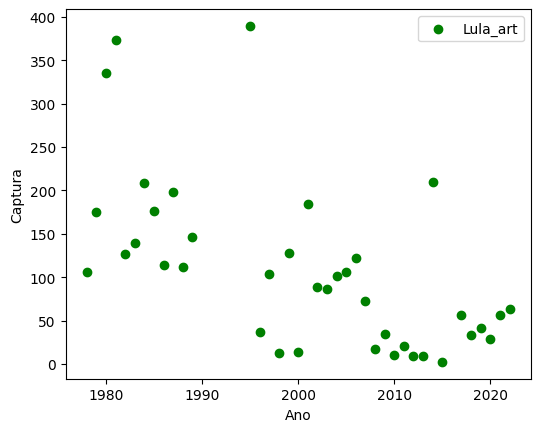

In [5]:
plt.figure(figsize=(6, 4.8))
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='Lula_art')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()



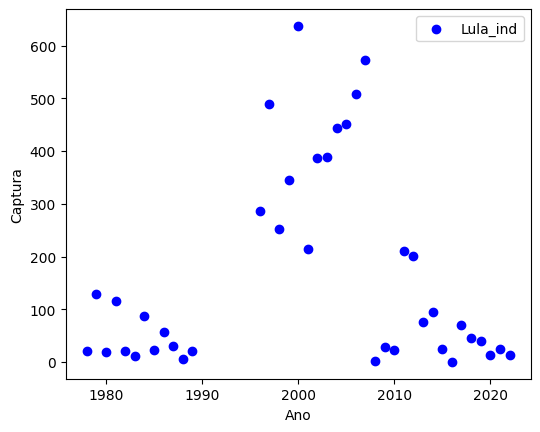

In [6]:
plt.figure(figsize=(6, 4.8))
plt.scatter(x1[:,0], x1[:,1], c='b', label= 'Lula_ind')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

A função "pd.DataFrame(x0, columns=['Ano', 'Lula_art'])" Cria um novo DataFrame "df_x0" a partir do array "x0". As colunas do DataFrame são nomeadas como "Ano" e "Lula_art".
"pd.DataFrame(x1, columns=["Ano", "Lula_ind"])" Cria um novo DataFrame "df_x1" a partir do array "x1". As colunas do DataFrame são nomeadas como "Ano" e "Lula_ind". A função "df_x0.drop_duplicates(subset='Lula_art')" remove as linhas duplicadas do DataFrame "df_x0" com base nos valores da coluna "Lula_art" e "df_x1.drop_duplicates(subset='Lula_ind')" faz o mesmo para  Lula industrial. Estas operações são úteis para garantir que cada valor de captura de lula (artesanal ou industrial) seja único dentro do DataFrame, evitando a influência de dados duplicados em análises subsequentes.

In [7]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Lula_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Lula_ind'])
df_x0= df_x0.drop_duplicates(subset= 'Lula_art')
df_x1= df_x1.drop_duplicates(subset='Lula_ind')

Normalização Dos dados

Essas linhas de código estão preparando os dados para o treinamento do modelo de machine learning, incluindo a normalização dos dados. A função "np.array(df_x0["Ano"], dtype=np.float32)" converte a coluna "Ano" do DataFrame "df_x0" em um array "NumPy" do tipo "float32". "np.array(df_x0['Lula_art'], dtype=np.float32)" converte a coluna "Lula_art" do DataFrame "df_x0" em um array "NumPy" do tipo "float32". 
"reshape(-1, 1)" redimensiona os arrays para que cada valor seja uma linha única em uma matriz coluna (2D), com uma única coluna. Este formato é frequentemente necessário para algoritmos de machine learning. "np.mean(x)" calcula a média dos valores no array "x". "np.std(x)" calcula o desvio padrão dos valores no array "x"."np.mean(y)" calcula a média dos valores no array y. "np.std(y)" calcula o desvio padrão dos valores no array y.
A conversão dos dados para "arrays NumPy" é um passo comum na preparação dos dados para machine learning, pois o frameworks o "TensorFlow" o esperam dados nesse formato. Calcular a média e o desvio padrão dos dados é um passo necessário para a normalização. A normalização é um método de pré-processamento de dados que ajusta os valores para uma escala comum, o que pode melhorar a performance e a estabilidade dos algoritmo. A normalização dos dados (escalonamento para média zero e desvio padrão unitário) ajuda a garantir que diferentes variáveis estejam na mesma escala, o que é importante para muitos algoritmos de machine learning. Sem normalização, variáveis com maior amplitude podem dominar a influência sobre o modelo, resultando em performance subótima.


In [8]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Lula_art'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

Definindo a frequência com que o callback irá imprimir informações durante o treinamento, especificamente a cada N épocas. Essa classe é usada para treinar modelos de redes neurais como TensorFlow quando é desejado controlar a saída do treinamento de maneira personalizadaexibindo métricas específicas em intervalos regulares de épocas. Ela permite monitorar o progresso do treinamento e visualizar como a perda (ou outras métricas) estão mudando ao longo do tempo.

In [9]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

Esse código realiza o treinamento de uma rede neural usando TensorFlow para fazer predições sobre dados de captura de lulas ao longo dos anos. Primeiro define um modelo sequencial (Sequential) do TensorFlow consistindo em várias camadas densas (Dense) com ativação leaky_relu. A primeira camada tem 1 neurônio de saída e input_shape=(1,), indicando que aceita entradas de dimensão 1 (anos). As camadas intermediárias têm 32, 64 e 128 neurônios, respectivamente, com ativação leaky_relu. A última camada tem 1 neurônio de saída para previsão. O otimizador como Nadam com taxa de aprendizado de 0.001. A função de perda como mse (Erro Quadrático Médio) e a métrica para monitoramento durante o treinamento como mse. O modelo é treinado com os dados normalizados "x_normalized" e "y_normalized", com número de epocas=500, batch_size=12 (tamanho da amostra por iteração). "steps_per_epoch=50":" especifica quantos passos por época. "callbacks= [print_every_100_epochs]" Chama o callback PrintEveryNEpochs a cada 100 épocas para imprimir o valor da perda.

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.4277961850166321
Epoch 200: loss = 0.5708121061325073
Epoch 300: loss = 0.3795752227306366
Epoch 400: loss = 0.41165000200271606
Epoch 500: loss = 0.4220775067806244
Epoch 600: loss = 0.5356394648551941
Epoch 700: loss = 0.34687164425849915
Epoch 800: loss = 0.3669097423553467
Epoch 900: loss = 0.3054429590702057
Epoch 1000: loss = 0.46905627846717834
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


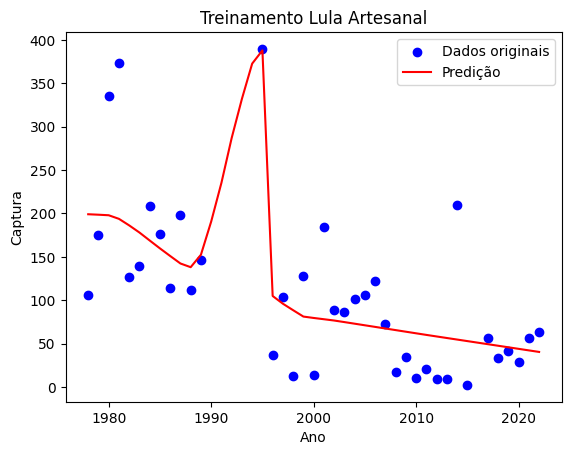

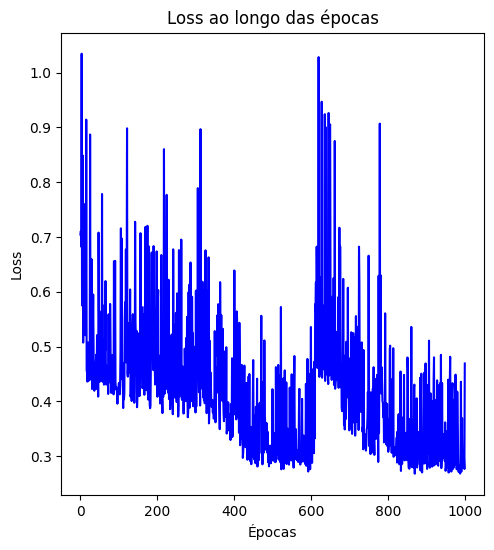

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
model.save_weights('pesos/.weights.h5', overwrite=True)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Lula Artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

Agora é realizado as previsões para anos específicos e visualiza tanto os dados originais quanto as previsões feitas pelo modelo. É um fluxo completo que mostra desde o treinamento até a avaliação das previsões feitas.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predição para o ano 1990: 190.63601684570312
Predição para o ano 1991: 235.2349853515625
Predição para o ano 1992: 286.88323974609375
Predição para o ano 1993: 332.00286865234375
Predição para o ano 1994: 372.5611877441406
Predição para o ano 2016: 51.206268310546875


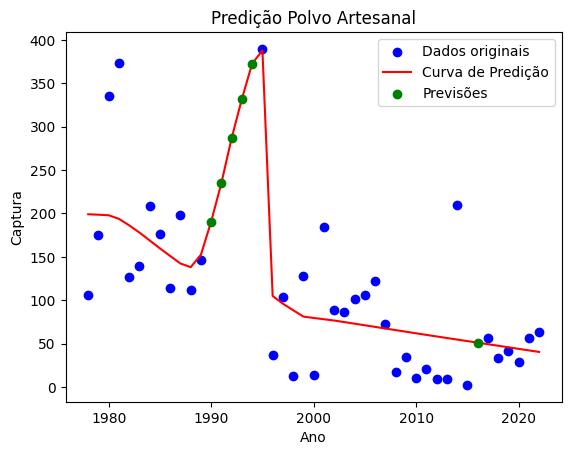

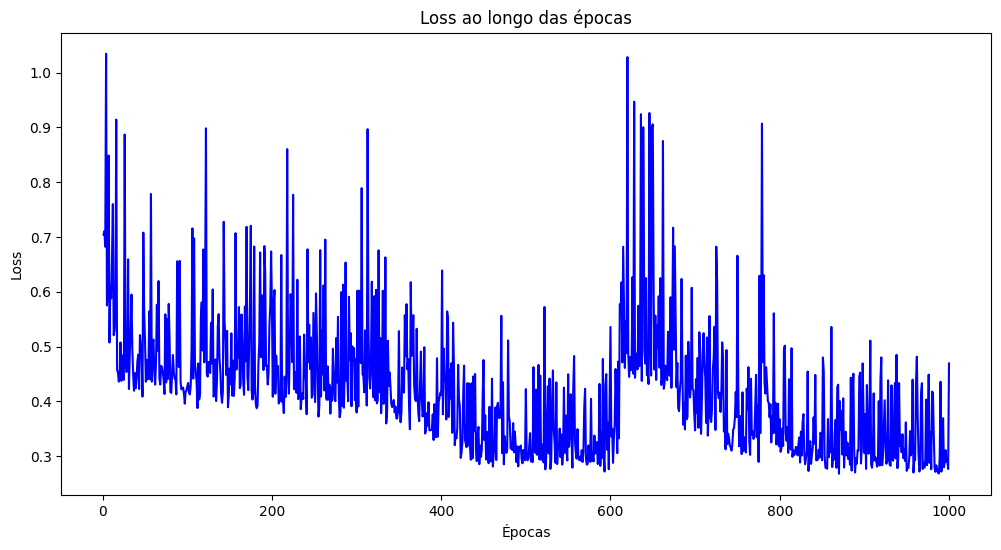

In [15]:
anos_para_prever = np.array([1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição Polvo Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [16]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Lula_artesanal_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1978.0        106.000000               NaN
1   1979.0        175.000000               NaN
2   1980.0        335.000000               NaN
3   1981.0        373.000000               NaN
4   1982.0        127.000000               NaN
5   1983.0        140.000000               NaN
6   1984.0        209.000000               NaN
7   1985.0        176.000000               NaN
8   1986.0        114.000000               NaN
9   1987.0        198.000000               NaN
10  1988.0        112.000000               NaN
11  1989.0        146.000000               NaN
12  1990.0               NaN        190.636017
13  1991.0               NaN        235.234985
14  1992.0               NaN        286.883240
15  1993.0               NaN        332.002869
16  1994.0               NaN        372.561188
17  1995.0        389.500000               NaN
18  1996.0         36.500000               NaN
19  1997.0        104.000000               NaN
20  1998.0   

LULA INDUSTRIAL

In [17]:
x = np.array(df_x1['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x1['Lula_ind'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.19568631052970886
Epoch 200: loss = 0.20625142753124237
Epoch 300: loss = 0.23157064616680145
Epoch 400: loss = 0.13117346167564392
Epoch 500: loss = 0.09935245662927628
Epoch 600: loss = 0.06593570858240128
Epoch 700: loss = 0.05718807131052017
Epoch 800: loss = 0.055425308644771576
Epoch 900: loss = 0.040039896965026855
Epoch 1000: loss = 0.06930337846279144
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


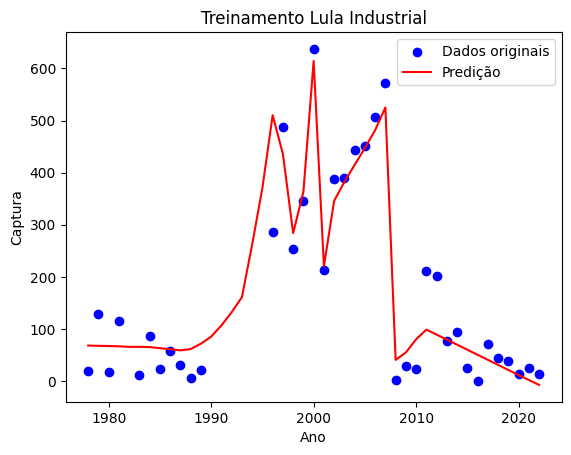

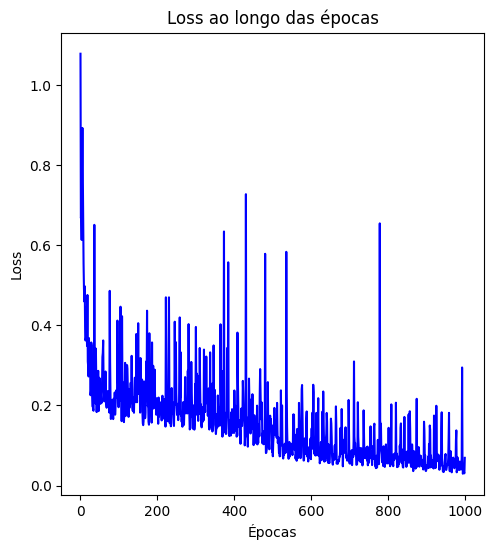

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Lula Industrial')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predição para o ano 1990: 85.21643829345703
Predição para o ano 1991: 106.73928833007812
Predição para o ano 1992: 132.0409698486328
Predição para o ano 1993: 160.9737091064453
Predição para o ano 1994: 262.1226501464844


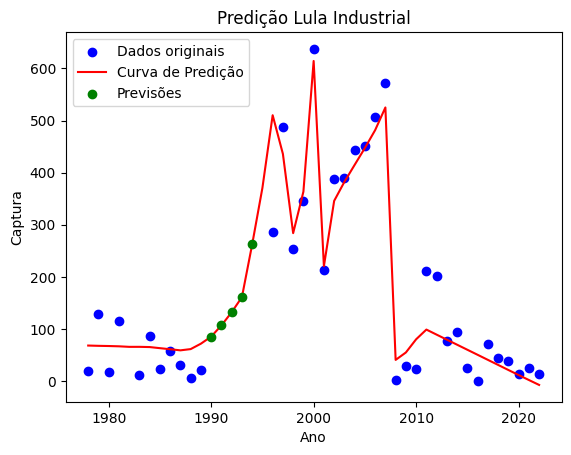

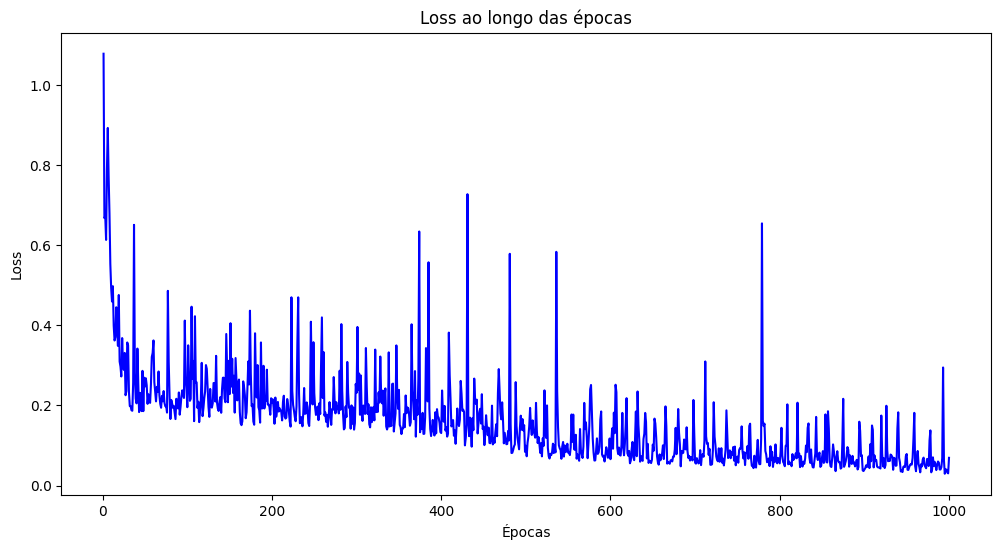

In [19]:
anos_para_prever = np.array([1990, 1991, 1992, 1993, 1994]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean

for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição Lula Industrial')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [21]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Lula_industrial_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1978.0         20.000000               NaN
1   1979.0        129.000000               NaN
2   1980.0         18.000000               NaN
3   1981.0        115.000000               NaN
4   1983.0         12.000000               NaN
5   1984.0         87.000000               NaN
6   1985.0         23.000000               NaN
7   1986.0         57.000000               NaN
8   1987.0         30.000000               NaN
9   1988.0          6.000000               NaN
10  1989.0         21.000000               NaN
11  1990.0               NaN         85.216438
12  1991.0               NaN        106.739288
13  1992.0               NaN        132.040970
14  1993.0               NaN        160.973709
15  1994.0               NaN        262.122650
16  1996.0        286.000000               NaN
17  1997.0        488.500000               NaN
18  1998.0        252.500000               NaN
19  1999.0        345.500000               NaN
20  2000.0   

LULA TOTAL

In [22]:
df_1 = pd.read_excel('DataFrame_reconstruido\Lula_artesanal_reconstruido.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Renan\AppData\Local\Temp\ipykernel_3964\249233856.py:1: SyntaxWarning: invalid escape sequence '\L'
  df_1 = pd.read_excel('DataFrame_reconstruido\Lula_artesanal_reconstruido.xlsx')


In [23]:
x0 = pd.DataFrame(df_1[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x1 = pd.DataFrame(df_1[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [24]:
resultado = x0['Captura Original'] + x1['Captura Preditos']

novo_df1 = pd.DataFrame({'Ano': df_1['Ano'], 'Lula_art': resultado})

print(novo_df1)

     Ano    Lula_art
0   1978  106.000000
1   1979  175.000000
2   1980  335.000000
3   1981  373.000000
4   1982  127.000000
5   1983  140.000000
6   1984  209.000000
7   1985  176.000000
8   1986  114.000000
9   1987  198.000000
10  1988  112.000000
11  1989  146.000000
12  1990  190.636017
13  1991  235.234985
14  1992  286.883240
15  1993  332.002869
16  1994  372.561188
17  1995  389.500000
18  1996   36.500000
19  1997  104.000000
20  1998   12.500000
21  1999  127.500000
22  2000   14.000000
23  2001  184.500000
24  2002   88.500000
25  2003   86.500000
26  2004  101.000000
27  2005  106.500000
28  2006  122.500000
29  2007   72.500000
30  2008   17.559999
31  2009   34.530201
32  2010   10.680000
33  2011   20.593000
34  2012    8.878000
35  2013    9.596000
36  2014  209.839005
37  2015    2.517000
38  2016   51.206268
39  2017   56.960030
40  2018   33.903400
41  2019   41.963600
42  2020   29.422100
43  2021   56.820000
44  2022   63.434299


In [25]:
df_2 = pd.read_excel('DataFrame_reconstruido\Lula_industrial_reconstruido.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Renan\AppData\Local\Temp\ipykernel_3964\1443897365.py:1: SyntaxWarning: invalid escape sequence '\L'
  df_2 = pd.read_excel('DataFrame_reconstruido\Lula_industrial_reconstruido.xlsx')


In [26]:
x2 = pd.DataFrame(df_2[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x3 = pd.DataFrame(df_2[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [27]:
resultado_2 = x2['Captura Original'] + x3['Captura Preditos']

novo_df_2 = pd.DataFrame({'Ano': df_2['Ano'], 'Lula_ind': resultado_2})

print(novo_df_2)

     Ano    Lula_ind
0   1978   20.000000
1   1979  129.000000
2   1980   18.000000
3   1981  115.000000
4   1983   12.000000
5   1984   87.000000
6   1985   23.000000
7   1986   57.000000
8   1987   30.000000
9   1988    6.000000
10  1989   21.000000
11  1990   85.216438
12  1991  106.739288
13  1992  132.040970
14  1993  160.973709
15  1994  262.122650
16  1996  286.000000
17  1997  488.500000
18  1998  252.500000
19  1999  345.500000
20  2000  637.500000
21  2001  214.000000
22  2002  387.500000
23  2003  389.500000
24  2004  444.000000
25  2005  451.500000
26  2006  507.500000
27  2007  572.500000
28  2008    2.167000
29  2009   28.509001
30  2010   22.627001
31  2011  210.690994
32  2012  201.509995
33  2013   76.178001
34  2014   94.943001
35  2015   25.068001
36  2016    0.023000
37  2017   70.802971
38  2018   44.520100
39  2019   38.862202
40  2020   13.996800
41  2021   25.391800
42  2022   13.432000


In [28]:
resultado = x0['Captura Original'] + x1['Captura Preditos'] + x2['Captura Original'] + x3['Captura Preditos']

lula_total = pd.DataFrame({'Ano': df_1['Ano'], 'Lula_total': resultado}).dropna()

print(lula_total)

     Ano  Lula_total
0   1978  126.000000
1   1979  304.000000
2   1980  353.000000
3   1981  488.000000
4   1982  139.000000
5   1983  227.000000
6   1984  232.000000
7   1985  233.000000
8   1986  144.000000
9   1987  204.000000
10  1988  133.000000
11  1989  231.216438
12  1990  297.375305
13  1991  367.275955
14  1992  447.856949
15  1993  594.125519
16  1994  658.561188
17  1995  878.000000
18  1996  289.000000
19  1997  449.500000
20  1998  650.000000
21  1999  341.500000
22  2000  401.500000
23  2001  574.000000
24  2002  532.500000
25  2003  538.000000
26  2004  608.500000
27  2005  679.000000
28  2006  124.667000
29  2007  101.009001
30  2008   40.187000
31  2009  245.221195
32  2010  212.189995
33  2011   96.771002
34  2012  103.821001
35  2013   34.664001
36  2014  209.862005
37  2015   73.319971
38  2016   95.726368
39  2017   95.822231
40  2018   47.900201
41  2019   67.355400
42  2020   42.854100


In [29]:
x = np.array(lula_total['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(lula_total['Lula_total'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.37748342752456665
Epoch 200: loss = 0.23076722025871277
Epoch 300: loss = 0.19684599339962006
Epoch 400: loss = 0.17891642451286316
Epoch 500: loss = 0.17155131697654724
Epoch 600: loss = 0.1824066936969757
Epoch 700: loss = 0.15460531413555145
Epoch 800: loss = 0.19616293907165527
Epoch 900: loss = 0.16868828237056732
Epoch 1000: loss = 0.17166754603385925
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001700AB77420> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to

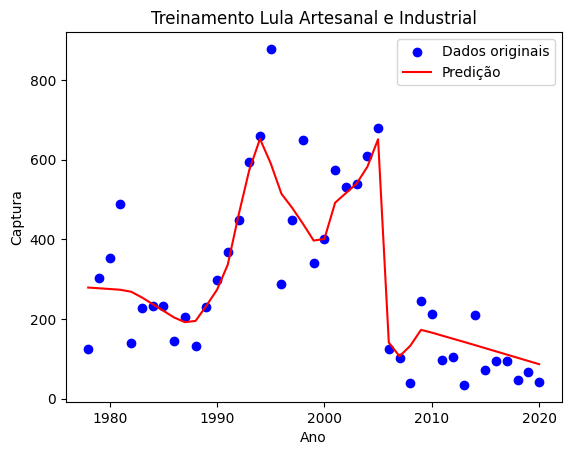

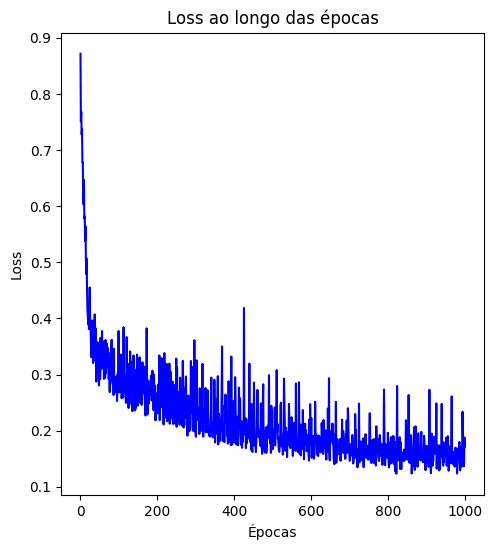

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)

x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Lula Artesanal e Industrial')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


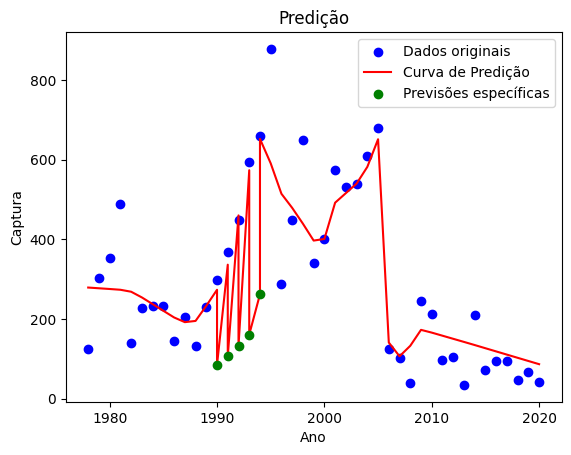

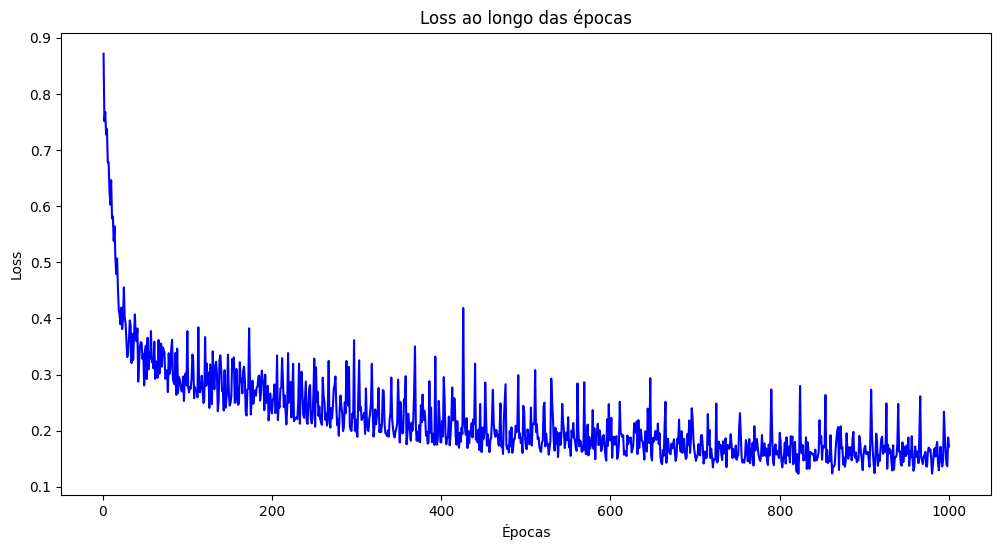

In [31]:
df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='outer').sort_values(by='Ano')

# Adicionando as previsões específicas aos dados combinados
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')

# Plotando os dados originais e as previsões
plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões específicas', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

# Plotando a perda ao longo das épocas
loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()